# **Iris Dataset Analysis - Sklearn Pipeline Demonstration**

Goal: To build and demonstrate sklearn pipelines for data preprocessing and modelling

**Context:**

Most machine learning models require us to perform several data preprocessing steps such as feature scaling, PCA etc. before actually training the model on the data. This leads to a writing a lot of code lines that when written sequentially look messy and the overall approach is not the best in terms readability.
Machine learning pipelines can be very handy in this case as they enable a user to write and organize cleaner looking code and help with the ease of understanding. Also, when new data is introduced, the pipeline automatically performs all the necessary pre processing steps before training the model on the new data for further prediction - thereby iterating and automating all the processing steps
We will be using the iris flower dataset from the sklearn library in order to demonstrate a machine learning pipeline in this notebook and predict the species of the flower

Dataset: Iris Dataset(iris.csv)
Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: Iris Setosa, Iris Versicolour, Iris Virginica

**Machine learning/Data Science Pipeline**

1.   Importing all required libraries
2.   Loading/Importing the dataset
3.   Data Exploration
4.   Splitting the data into training and test datasets
5.   Creating Pipelines
6.   Model Comparison/Interpreting the results

## Importing the libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing the dataset

In [23]:
dataset = pd.read_csv('iris.csv')

##Data Exploration

In [24]:
dataset.shape

(150, 5)

Dataset has 5 variables and 150 records/rows

In [25]:
#read first 5 observations
dataset.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#check datatypes
dataset.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

In [27]:
#check for missing values
dataset.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

there are no nulls in dataset

**Let's check for some descriptive statistics**

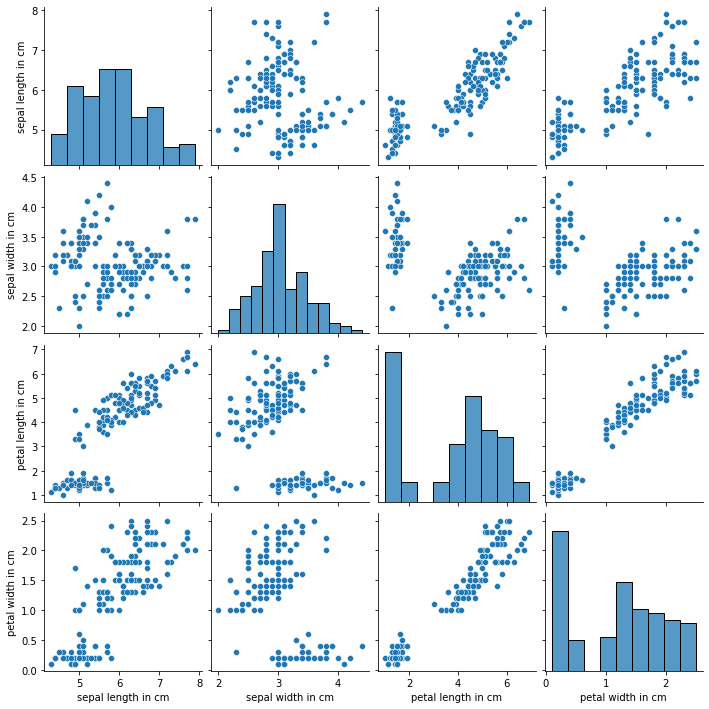

In [28]:
plotdf = dataset
sns.pairplot(data=plotdf)
plt.show()

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


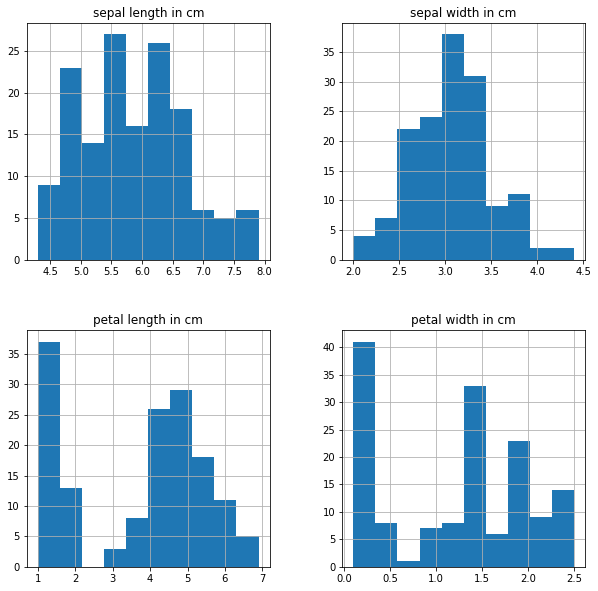

In [29]:
#running descriptive statistics on all numerical variables
p=dataset.hist(figsize = (10,10))
dataset.describe().transpose()

Lets check correlation between the variables

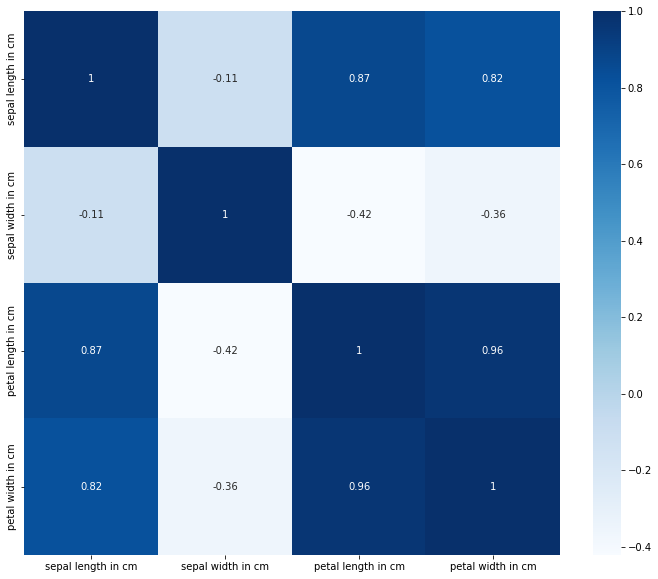

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),cmap='Blues',annot=True,cbar=True)
plt.show()



1.   Correlation is a statistical measure that explains how one or more numerical variables are related to each other. It is used to check for linear dependencies between the independent variables/features of the data.
2.   Two features are said to be positively correlated with each other if increase in the value of one variable results in the proportional increase in the value of the other.
3.   Correlation coefficient can have a value in the range of -1.0 to 1.0. A value of 0 indicates that there is no correlation between the variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


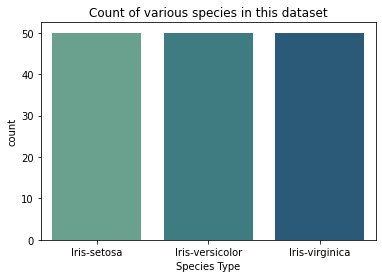

In [31]:
sns.countplot(dataset['class'], palette='crest')
plt.title('Count of various species in this dataset')
plt.xlabel('Species Type')
plt.show()

##Creating array of X and Y and then creating training and test sets

In [74]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Creating Pipelines



1.   We will now create scikit learn pipelines that will perform all the data pre processing, dimensionality reduction and then fit the various classification models on the training set.
2.   For the purpose of this project we will be implementing the following ML algorithms for classification, each in a seperate pipeline
    

                    1.   Logistic Regression
                    2.   Decision Tree
                    3.   Random Forest







In [75]:
#Logistic Regression pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [76]:
#Decision Tree pipeline
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [77]:
#Random Forest pipeline
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier(n_estimators=10))])

In [78]:
#list of all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [79]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

## Model Comparison

In [80]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

#model comparison and evaluating model performance
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.8666666666666667


We can see that the both Decision tree and RandomForest yield the highest accuracy for this dataset.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Iris